In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random



In [3]:
df = pd.read_csv('cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
df.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
#look for missing values 
df.isna().any()

ID               False
N_Days           False
Status           False
Drug              True
Age              False
Sex              False
Ascites           True
Hepatomegaly      True
Spiders           True
Edema            False
Bilirubin        False
Cholesterol       True
Albumin          False
Copper            True
Alk_Phos          True
SGOT              True
Tryglicerides     True
Platelets         True
Prothrombin       True
Stage             True
dtype: bool

In [7]:
#look for missing values number
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [8]:
#columns with numerical values 
num_cols = df._get_numeric_data().columns
num_cols
for col in num_cols:
    if df[col].nunique() <= 4:
        num_cols = num_cols.drop(col)

num_cols


Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

In [9]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers
for col in num_cols:
    outliers = find_outliers_IQR(df[col])
    if len(outliers) >0:
        print(col)
        
        print( 'number of outliers:'+ str(len(outliers)))

        print('max outlier value: '+ str(outliers.max()))

        print('min outlier value: '+ str(outliers.min()))
       
        print('##############')

Bilirubin
number of outliers:46
max outlier value: 28.0
min outlier value: 7.3
##############
Cholesterol
number of outliers:20
max outlier value: 1775.0
min outlier value: 636.0
##############
Albumin
number of outliers:9
max outlier value: 4.64
min outlier value: 1.96
##############
Copper
number of outliers:17
max outlier value: 588.0
min outlier value: 247.0
##############
Alk_Phos
number of outliers:35
max outlier value: 13862.4
min outlier value: 3681.0
##############
SGOT
number of outliers:7
max outlier value: 457.25
min outlier value: 272.8
##############
Tryglicerides
number of outliers:10
max outlier value: 598.0
min outlier value: 260.0
##############
Platelets
number of outliers:6
max outlier value: 721.0
min outlier value: 514.0
##############
Prothrombin
number of outliers:18
max outlier value: 18.0
min outlier value: 12.9
##############


In [10]:
#replace outliers with median value 
outliers_cols = []
for col in num_cols:
    outliers = find_outliers_IQR(df[col])
    if len(outliers) >0:
        outliers_cols.append(col)
for col in outliers_cols:
    if col == 'Prothrombin':
        median = df[col].quantile(0.50)
        high = df[col].quantile(0.25)
        low = df[col].quantile(0.75)
        df[col] = np.where(df[col] > high, median, df[col])
#         df[col] = np.where(df[col] < low, median, df[col])
df.describe()

    

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.376442,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,0.385737,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,10.600000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,10.600000,4.000000


In [11]:
#columns with numerical values missing 
contentious_cols_nan = []
for col in num_cols:
    if df[col].isnull().values.any():
        contentious_cols_nan.append(col)
contentious_cols_nan

['Cholesterol',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [12]:
#looking into categorial data 
categorial_data=df.loc[:,df.nunique() <= 4]
cat_cols = [col for col in df.columns if col in categorial_data]
cat_cols



['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage']

In [13]:
df[cat_cols].isna().any()

Status          False
Drug             True
Sex             False
Ascites          True
Hepatomegaly     True
Spiders          True
Edema           False
Stage            True
dtype: bool

In [14]:
#columns with categorial values missing 
cat_cols_nan = []
for col in cat_cols:
    if df[col].isnull().values.any():
        cat_cols_nan.append(col)
cat_cols_nan

['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']

In [15]:
for col in cat_cols_nan:
    print(df[col].unique())

['D-penicillamine' 'Placebo' nan]
['Y' 'N' nan]
['Y' 'N' nan]
['Y' 'N' nan]
[ 4.  3.  2.  1. nan]


In [16]:
for col in cat_cols_nan:
    print(df[col].value_counts(dropna = False, normalize = True))

D-penicillamine    0.377990
Placebo            0.368421
NaN                0.253589
Name: Drug, dtype: float64
N      0.688995
NaN    0.253589
Y      0.057416
Name: Ascites, dtype: float64
Y      0.382775
N      0.363636
NaN    0.253589
Name: Hepatomegaly, dtype: float64
N      0.531100
NaN    0.253589
Y      0.215311
Name: Spiders, dtype: float64
3.0    0.370813
4.0    0.344498
2.0    0.220096
1.0    0.050239
NaN    0.014354
Name: Stage, dtype: float64


In [17]:
# fill missing valuesin categorial columns while keeping ratio
for col in cat_cols_nan:
    nans = df[col].isna()

    length = sum(nans)
    val_list = df[col].dropna().unique() #all categories
    num_val = [] #count of each category while keeping the same order as in val_list 
    for val_1 in val_list:
        count = (df[col] == val_1).sum()
        num_val.append(count)
    num_val_ratio= [] #ration of each category while keeping the same order as in val_list
    for val_2 in num_val:
        ratio = val_2/sum(num_val)
        num_val_ratio.append(ratio)

    replacement = random.choices(val_list, weights=num_val_ratio, k=length)
    df.loc[nans,col] = replacement

df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,10.6,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,10.6,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.6,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,N,N,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.6,3.0
414,415,1103,C,Placebo,14245,F,N,N,N,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,10.6,4.0
415,416,1055,C,D-penicillamine,20819,F,N,N,N,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,Placebo,21185,F,N,Y,N,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.6,3.0


In [18]:
# change categorial columns to numbers 
encoder = preprocessing.LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,10.6,3
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,10.6,3
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.6,3
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,0,24472,0,0,0,0,0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.6,2
414,415,1103,0,1,14245,0,0,0,0,0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,10.6,3
415,416,1055,0,0,20819,0,0,0,0,0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,2
416,417,691,0,1,21185,0,0,1,0,0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.6,2


In [19]:
#KNN to add values to empty spots in coiumns with contentious values 
imputer = KNNImputer(n_neighbors=5)
df_imputation = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

df_imputation

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1.0,400.0,2.0,0.0,21464.0,0.0,1.0,1.0,1.0,2.0,14.5,261.0,2.60,156.0,1718.00,137.950,172.0,190.0,10.6,3.0
1,2.0,4500.0,0.0,0.0,20617.0,0.0,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.80,113.520,88.0,221.0,10.6,2.0
2,3.0,1012.0,2.0,0.0,25594.0,1.0,0.0,0.0,0.0,1.0,1.4,176.0,3.48,210.0,516.00,96.100,55.0,151.0,10.6,3.0
3,4.0,1925.0,2.0,0.0,19994.0,0.0,0.0,1.0,1.0,1.0,1.8,244.0,2.54,64.0,6121.80,60.630,92.0,183.0,10.6,3.0
4,5.0,1504.0,1.0,1.0,13918.0,0.0,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.00,113.150,72.0,136.0,10.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414.0,681.0,2.0,0.0,24472.0,0.0,0.0,0.0,0.0,0.0,1.2,291.4,2.96,150.4,2368.04,112.872,150.0,174.0,10.6,2.0
414,415.0,1103.0,0.0,1.0,14245.0,0.0,0.0,0.0,0.0,0.0,0.9,361.2,3.83,69.8,1427.40,106.600,110.2,180.0,10.6,3.0
415,416.0,1055.0,0.0,0.0,20819.0,0.0,0.0,0.0,0.0,0.0,1.6,370.4,3.42,115.0,1182.60,106.440,100.2,143.0,9.9,2.0
416,417.0,691.0,0.0,1.0,21185.0,0.0,0.0,1.0,0.0,0.0,0.8,457.4,3.75,165.8,1560.40,149.810,112.8,269.0,10.6,2.0


In [20]:
df_imputation.isna().any()

ID               False
N_Days           False
Status           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
dtype: bool

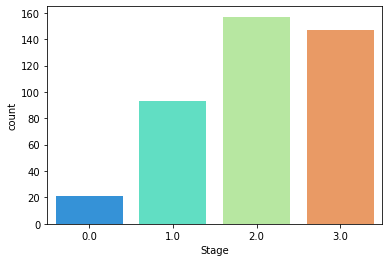

In [21]:
ax = sns.countplot(data = df_imputation, x = 'Stage',palette='rainbow')


In [22]:
# Split the data for train and test 
x, y = df_imputation.drop(['ID', 'Stage'], axis=1), df_imputation['Stage']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
print(x_train.shape, x_test.shape)

(334, 18) (84, 18)


In [23]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(x_train, y_train)
y_pred_svc = classifier_svc.predict(x_test)
from sklearn.metrics import accuracy_score
print("SVM - " , accuracy_score(y_test, y_pred_svc))



SVM -  0.4166666666666667


In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 100)
rf.fit(x_train, y_train)
probs = rf.predict_proba(x_test)
score = roc_auc_score(y_test, probs, multi_class = 'ovr')
score

0.7004952418220589

In [25]:
# XGB
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix


xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

# - cross validataion
scores = cross_val_score(xgbc, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())



Mean cross-validation score: 0.45
K-fold CV average score: 0.46


In [26]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')
param_grid_xgb = [{'eta' : [0.005, 0.05, 0.1, 0.3, 0.5], 'max_depth' : [2, 4, 6, 8, 10], 'lambda': [0.25, 0.5, 1, 1.5, 2]}]
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv = 5, return_train_score = True)
grid_search_xgb.fit(x_train, y_train)
grid_search_xgb.best_params_, grid_search_xgb.best_score_

/Users/maib/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/maib/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


({'eta': 0.005, 'lambda': 1, 'max_depth': 4}, 0.48493894165535945)

In [27]:
# Decsion Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(x_train, y_train)
y_pred_dt = classifier_dt.predict(x_test)
print("Decision Tree - ", accuracy_score(y_test, y_pred_dt))


Decision Tree -  0.4166666666666667


In [28]:
# Neural Network
# import tensorflow as tf

# # set seed
# tf.random.set_seed(42)

# # model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="relu"),
#     tf.keras.layers.Dense(4)
# ])

# # compile
# model.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
#                 metrics="accuracy")

# # fit model
# model.fit(X_train, y_train, epochs=500, verbose=0)